In [224]:
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn
import numpy as np

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#makes plots appear in the notebook
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from datetime import datetime
import requests
from io import StringIO

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [225]:
xrfdata=pd.read_csv (r'L:\D\DuncanF\XRFCal.csv')

In [226]:
xrfdf=DataFrame(xrfdata)

In [227]:
xrfdf=xrfdf.set_index('Depth')

In [228]:
elements=xrfdf.drop(['Qtz','K-spar','Plag','Kaolinite', 'Illite', 'Smectite', 'Mg.Smectite','Glauconite', 'Chlorite', 'Calcite', 'Dolomite','Ankerite', 'Pyrite','Coal','Qtz.+.Feld','Clays','Carbonate+Py'],axis=1)

In [229]:
elements

,Na,Mg,Al,Si,P,S,Cl,K,Ca,Ti,...,Rb,Sr,Y,Zr,Nb,Mo,Ba,Pb,Th,U
Depth,,,,,,,,,,,,,,,,,,,,,
291.5,1.400892,0.987307,8.444962,28.815236,0.047391,0.660065,0.0,2.008183,0.313410,0.390184,...,0.011997,0.020487,0.002862,0.020016,0.002129,0.000362,0.073610,0.002197,0.001099,0.000000
291.7,2.192267,0.891897,7.512934,30.522028,0.062330,0.403997,0.0,1.895364,0.276442,0.377849,...,0.010585,0.021759,0.003297,0.024895,0.001708,0.000215,0.071527,0.002605,0.001707,0.000000
291.9,1.270678,0.953775,7.719398,30.033172,0.096765,0.634428,0.0,1.874682,0.287604,0.325719,...,0.009666,0.019659,0.002861,0.019705,0.001792,0.000670,0.074641,0.002049,0.000630,0.000000
292.1,1.304300,1.153923,8.962972,28.587291,0.029305,0.524236,0.0,2.007632,0.250124,0.384405,...,0.011892,0.022942,0.002478,0.017906,0.001903,0.000866,0.080349,0.002707,0.001777,0.000574
292.3,1.460732,0.943332,8.366978,27.843581,0.022133,0.659656,0.0,1.846548,0.176400,0.348602,...,0.011851,0.020452,0.002585,0.016786,0.002024,0.000545,0.069900,0.002792,0.001587,0.000769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456.9,1.373596,0.000000,0.000000,0.180816,0.015892,0.264920,0.0,0.019810,8.668584,0.012645,...,0.001517,0.046499,0.000000,0.001308,0.000000,0.000587,0.007107,0.001120,0.000287,0.002148
457.1,1.624484,0.000000,0.000000,0.171103,0.014459,0.275571,0.0,0.016932,10.551529,0.010759,...,0.000746,0.040306,0.000478,0.000000,0.000000,0.000649,0.000000,0.000000,0.000000,0.000000
457.3,3.944078,0.000000,0.000000,0.148568,0.000000,1.150432,0.0,0.075000,24.495343,0.019337,...,0.000335,0.030105,0.000000,0.000480,0.000466,0.000458,0.008490,0.000748,0.000425,0.000000


Text(0.5, 1.0, 'Predicted Quartz value  R2: 0.9513773648931646')

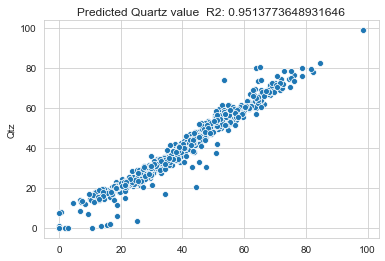

In [230]:
Qtz=xrfdf.Qtz
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Qtz)
lregQtz=LinearRegression()
lregQtz.fit(x_train,y_train)
predict_train=lregQtz.predict(x_train)
predict_test=lregQtz.predict(x_test)
predict_test[predict_test < 0] = 0 # zero out negative numbers
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Quartz value  R2: ' + str(r2_score(predict_test, y_test)))

In [231]:
rtest=elements.copy()
rtest['Mineral']=Qtz

rtest.corrwith(rtest['Mineral'],axis=0, method='pearson')

Na         0.008494
Mg        -0.439371
Al        -0.510235
Si         0.424227
P         -0.191798
S          0.097973
Cl        -0.047025
K         -0.370376
Ca        -0.401835
Ti        -0.070987
V         -0.393741
Cr        -0.234152
Mn        -0.229777
Fe        -0.325095
Co        -0.253151
Ni        -0.306820
Cu        -0.434515
Zn        -0.270890
Ga        -0.420901
As        -0.074013
Se        -0.074003
Rb        -0.125304
Sr        -0.477132
Y          0.251355
Zr         0.527375
Nb         0.182480
Mo        -0.129893
Ba        -0.209193
Pb        -0.059501
Th         0.039854
U         -0.073337
Mineral    1.000000
dtype: float64

Text(0.5, 1.0, 'Predicted K Spar value  R2: 0.9460383845558894')

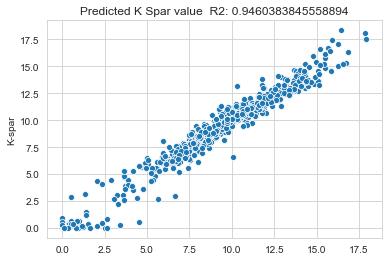

In [232]:
Kspar=xrfdf['K-spar']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Kspar)
lregKspar=LinearRegression()
lregKspar.fit(x_train,y_train)
predict_train=lregKspar.predict(x_train)
predict_test=lregKspar.predict(x_test)
predict_test[predict_test < 0] = 0 # zero out negative numbers
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Predicted K Spar value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Plag value  R2: 0.5435101323305074')

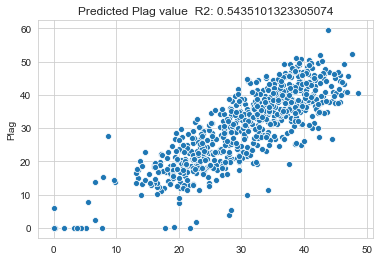

In [233]:
Plag=xrfdf.Plag
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Plag)
lregPlag=LinearRegression()
lregPlag.fit(x_train,y_train)
predict_train=lregPlag.predict(x_train)
predict_test=lregPlag.predict(x_test)
predict_test[predict_test < 0] = 0 # zero out negative numbers
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Predicted Plag value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Kaolinite value  R2: 0.7948818403740516')

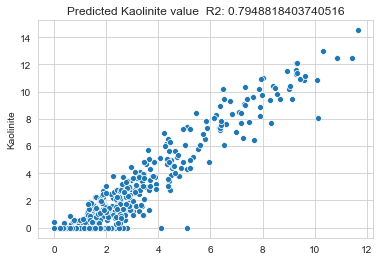

In [234]:
Kaolinite=xrfdf.Kaolinite
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Kaolinite)
lregKaolinite=LinearRegression()
lregKaolinite.fit(x_train,y_train)
predict_train=lregKaolinite.predict(x_train)
predict_test=lregKaolinite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Predicted Kaolinite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Polynomial Predicted Kaolinite value  R2: 0.2597158505289954')

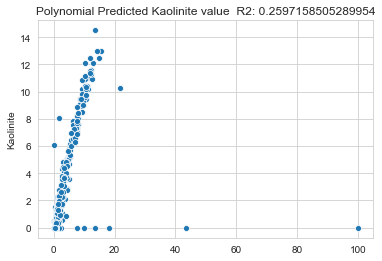

In [235]:
degree=2
polyregKaolinite=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregKaolinite.fit(x_train,y_train)
predict_train=polyregKaolinite.predict(x_train)
predict_test=polyregKaolinite.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted Kaolinite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Illite value  R2: 0.8774634269326521')

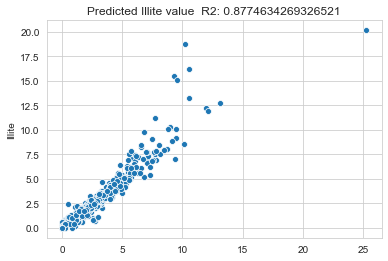

In [236]:
Illite=xrfdf.Illite
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Illite)
lregIllite=LinearRegression()
lregIllite.fit(x_train,y_train)
predict_train=lregIllite.predict(x_train)
predict_test=lregIllite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Predicted Illite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Polynomial Predicted Illite value  R2: 0.2130539817868311')

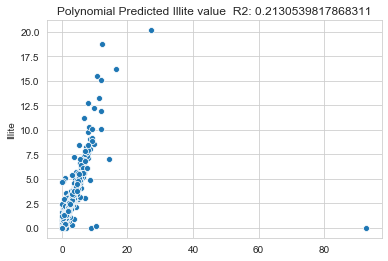

In [237]:

degree=2
polyregIllite=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregIllite.fit(x_train,y_train)
predict_train=polyregIllite.predict(x_train)
predict_test=polyregIllite.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted Illite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Smectite value  R2: 0.7465785207127622')

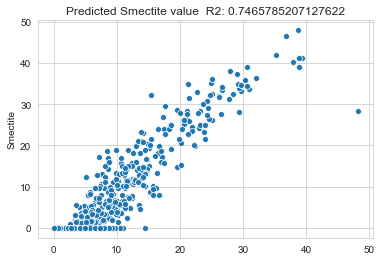

In [238]:
Smectite=xrfdf.Smectite
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Smectite)
lregSmectite=LinearRegression()
lregSmectite.fit(x_train,y_train)
predict_train=lregSmectite.predict(x_train)
predict_test=lregSmectite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Predicted Smectite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Polynomial Predicted Smectite value  R2: 0.5582131469427286')

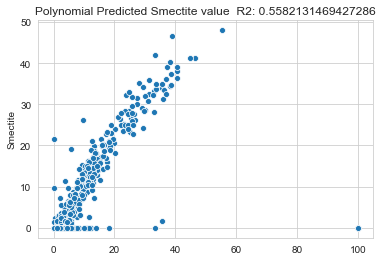

In [239]:

degree=2
polyregSmectite=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregSmectite.fit(x_train,y_train)
predict_train=polyregSmectite.predict(x_train)
predict_test=polyregSmectite.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted Smectite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Mg Smectite value  R2: 1.0')

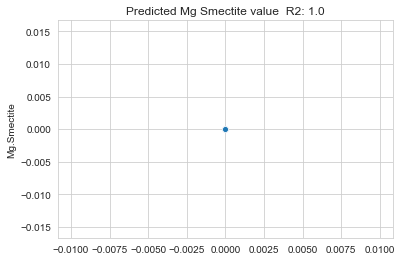

In [240]:
MgSmectite=xrfdf['Mg.Smectite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,MgSmectite)
lregMgSmectite=LinearRegression()
lregMgSmectite.fit(x_train,y_train)
predict_train=lregMgSmectite.predict(x_train)
predict_test=lregMgSmectite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Predicted Mg Smectite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Glauconite value  R2: 1.0')

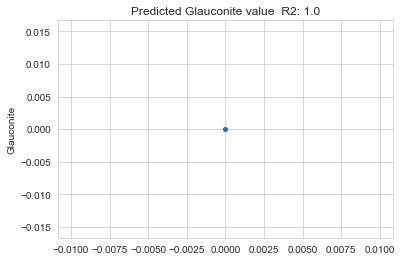

In [241]:
Glauconite=xrfdf['Glauconite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Glauconite)
lregGlauconite=LinearRegression()
lregGlauconite.fit(x_train,y_train)
predict_train=lregGlauconite.predict(x_train)
predict_test=lregGlauconite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Glauconite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Chlorite value  R2: -2.7011009173578957')

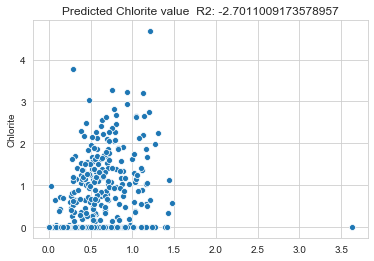

In [242]:
Chlorite=xrfdf['Chlorite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Chlorite)
lregChlorite=LinearRegression()
lregChlorite.fit(x_train,y_train)
predict_train=lregChlorite.predict(x_train)
predict_test=lregChlorite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Chlorite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Calcite value  R2: 0.9194323454477248')

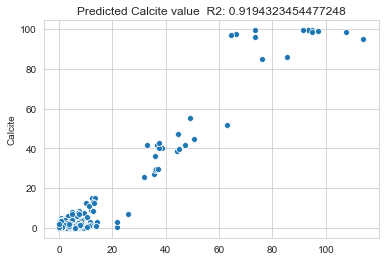

In [243]:
Calcite=xrfdf['Calcite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Calcite)
lregCalcite=LinearRegression()
lregCalcite.fit(x_train,y_train)
predict_train=lregCalcite.predict(x_train)
predict_test=lregCalcite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Calcite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Dolomite value  R2: 1.0')

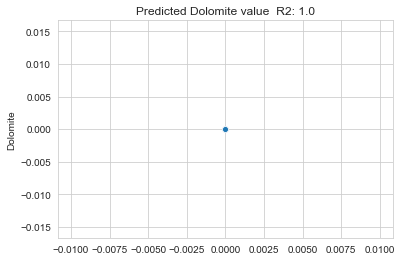

In [244]:
Dolomite=xrfdf['Dolomite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Dolomite)
lregDolomite=LinearRegression()
lregDolomite.fit(x_train,y_train)
predict_train=lregDolomite.predict(x_train)
predict_test=lregDolomite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Dolomite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Ankerite value  R2: 0.8589655432933059')

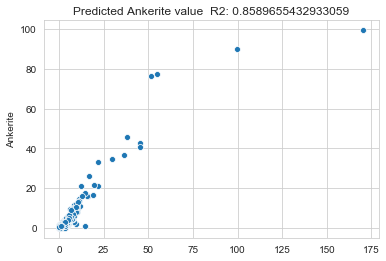

In [245]:
Ankerite=xrfdf['Ankerite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Ankerite)
lregAnkerite=LinearRegression()
lregAnkerite.fit(x_train,y_train)
predict_train=lregAnkerite.predict(x_train)
predict_test=lregAnkerite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Ankerite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Polynomial Predicted Ankerite value  R2: 0.8487918367671858')

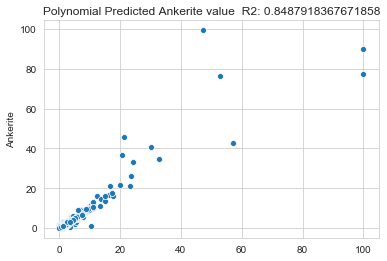

In [246]:

degree=2
polyregAnkerite=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregAnkerite.fit(x_train,y_train)
predict_train=polyregAnkerite.predict(x_train)
predict_test=polyregAnkerite.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted Ankerite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Pyrite value  R2: 0.6388490388801702')

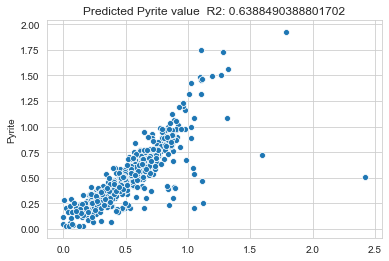

In [247]:
Pyrite=xrfdf['Pyrite']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Pyrite)
lregPyrite=LinearRegression()
lregPyrite.fit(x_train,y_train)
predict_train=lregPyrite.predict(x_train)
predict_test=lregPyrite.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Pyrite value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Polynomial Predicted Pyrite value  R2: 0.29028172865455204')

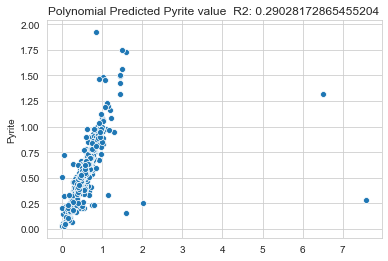

In [248]:

degree=2
polyregPyrite=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregPyrite.fit(x_train,y_train)
predict_train=polyregPyrite.predict(x_train)
predict_test=polyregPyrite.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted Pyrite value  R2: ' + str(r2_score(predict_test, y_test)))

In [249]:
coeff_Pyrite = DataFrame(elements.columns)
coeff_Pyrite.columns = ['Features']
coeff_Pyrite['Coefficient Estimate']= Series(lregPyrite.coef_)
coeff_Pyrite

,Features,Coefficient Estimate
0,Na,0.012446
1,Mg,0.013800
2,Al,-0.029753
3,Si,-0.011556
4,P,-0.158598
5,S,0.020638
6,Cl,0.177784
7,K,-0.057580
8,Ca,-0.012860
9,Ti,0.227294


In [250]:
rtest=elements.copy()
rtest['Mineral']=Pyrite

rtest.corrwith(rtest['Mineral'],axis=0, method='pearson')

Na         0.280117
Mg         0.074331
Al         0.055272
Si        -0.286206
P          0.304715
S          0.281830
Cl         0.002232
K          0.047594
Ca        -0.192795
Ti        -0.059839
V          0.498070
Cr         0.244881
Mn         0.024789
Fe         0.288149
Co         0.131611
Ni         0.364446
Cu         0.161602
Zn         0.307385
Ga         0.289859
As         0.394512
Se         0.037863
Rb         0.160884
Sr         0.336588
Y         -0.100714
Zr        -0.271598
Nb        -0.171822
Mo         0.152170
Ba         0.367411
Pb        -0.030685
Th        -0.163089
U         -0.021600
Mineral    1.000000
dtype: float64

Text(0.5, 1.0, 'Predicted Coal value  R2: -17.978871815428654')

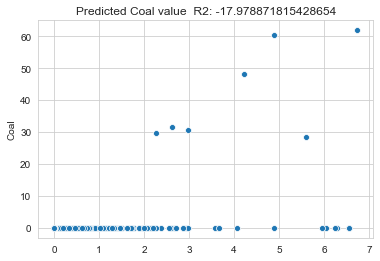

In [251]:
Coal=xrfdf['Coal']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Coal)
lregCoal=LinearRegression()
lregCoal.fit(x_train,y_train)
predict_train=lregCoal.predict(x_train)
predict_test=lregCoal.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Coal value  R2: ' + str(r2_score(predict_test, y_test)))

Text(0.5, 1.0, 'Predicted Clay value  R2:0.8060888179966088')

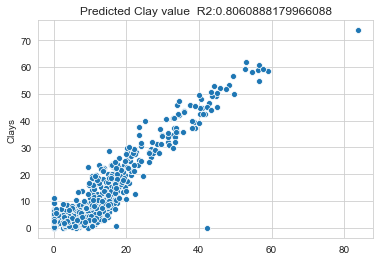

In [252]:
Clays=xrfdf['Clays']
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(elements,Clays)
lregClays=LinearRegression()
lregClays.fit(x_train,y_train)
predict_train=lregClays.predict(x_train)
predict_test=lregClays.predict(x_test)
predict_test[predict_test < 0] = 0
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()
ax.set_title('Predicted Clay value  R2:' + str(r2_score(predict_test, y_test)))

In [253]:
coeff_Clay = DataFrame(elements.columns)
coeff_Clay.columns = ['Features']
coeff_Clay['Coefficient Estimate']= Series(lregClays.coef_)

coeff_Clay

,Features,Coefficient Estimate
0,Na,-6.513702
1,Mg,1.440038
2,Al,8.431635
3,Si,-0.405176
4,P,12.473452
5,S,0.066140
6,Cl,-1.168096
7,K,-13.631508
8,Ca,0.472529
9,Ti,-3.799580


In [254]:
rtest=elements.copy()
rtest['Mineral']=Clays

rtest.corrwith(rtest['Mineral'],axis=0, method='pearson')


Na        -0.426179
Mg         0.468331
Al         0.779465
Si         0.246965
P          0.093019
S         -0.295299
Cl         0.055205
K          0.615891
Ca        -0.132037
Ti         0.465391
V          0.292820
Cr         0.237578
Mn         0.008853
Fe         0.142663
Co         0.079322
Ni         0.209838
Cu         0.443668
Zn         0.240497
Ga         0.555777
As         0.161018
Se         0.043999
Rb         0.599190
Sr        -0.038070
Y          0.256583
Zr        -0.059396
Nb         0.306424
Mo        -0.010150
Ba        -0.085526
Pb         0.227257
Th         0.319850
U          0.114449
Mineral    1.000000
dtype: float64

Text(0.5, 1.0, 'Polynomial Predicted Clay value  R2: 0.7733248200409563')

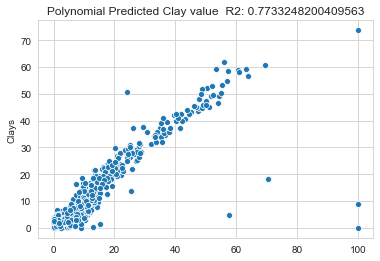

In [255]:
degree=2
polyregClay=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyregClay.fit(x_train,y_train)
predict_train=polyregClay.predict(x_train)
predict_test=polyregClay.predict(x_test)
predict_test[predict_test < 0] = 0
predict_test[predict_test > 100] = 100
sns.scatterplot(x=predict_test,y=y_test)
ax=plt.gca()

ax.set_title('Polynomial Predicted Clay value  R2: ' + str(r2_score(predict_test, y_test)))

In [256]:
PredictXrfData=pd.read_csv (r'L:\D\DuncanF\1aa090806904elements.csv')
PredictXrfDf=DataFrame(PredictXrfData)
PredictXrfDf=PredictXrfDf.set_index('Depth')
PredictXrfDf.head()

,Na,Mg,Al,Si,P,S,Cl,K,Ca,Ti,...,Rb,Sr,Y,Zr,Nb,Mo,Ba,Pb,Th,U
Depth,,,,,,,,,,,,,,,,,,,,,
478.4,0.83,0.35,3.62,16.66,0.02842,0.27,0.00,1.15,0.83,0.17563,...,0.00524,0.03382,0.00215,0.01415,0.00087,0.00032,0.08858,0.00115,0.00000,0.00000
478.5,1.29,0.43,4.35,19.07,0.03281,0.85,0.10,1.44,1.05,0.19798,...,0.00571,0.03785,0.00137,0.00910,0.00112,0.00000,0.09684,0.00094,0.00000,0.00000
478.6,1.39,1.14,5.83,19.56,0.03926,0.75,0.30,1.20,1.69,0.43200,...,0.00487,0.05091,0.00205,0.01494,0.00062,0.00043,0.07692,0.00101,0.00146,0.00077
478.7,1.20,0.46,4.52,19.77,0.04542,0.23,0.07,1.17,1.21,0.21723,...,0.00477,0.03609,0.00176,0.01316,0.00062,0.00032,0.10168,0.00072,0.00000,0.00000
478.8,1.84,0.53,4.77,20.29,0.03470,0.27,1.78,1.50,1.20,0.22565,...,0.00552,0.03598,0.00156,0.00890,0.00087,0.00000,0.12841,0.00151,0.00073,0.00043


In [257]:
elements.head()

,Na,Mg,Al,Si,P,S,Cl,K,Ca,Ti,...,Rb,Sr,Y,Zr,Nb,Mo,Ba,Pb,Th,U
Depth,,,,,,,,,,,,,,,,,,,,,
291.5,1.400892,0.987307,8.444962,28.815236,0.047391,0.660065,0.0,2.008183,0.313410,0.390184,...,0.011997,0.020487,0.002862,0.020016,0.002129,0.000362,0.073610,0.002197,0.001099,0.000000
291.7,2.192267,0.891897,7.512934,30.522028,0.062330,0.403997,0.0,1.895364,0.276442,0.377849,...,0.010585,0.021759,0.003297,0.024895,0.001708,0.000215,0.071527,0.002605,0.001707,0.000000
291.9,1.270678,0.953775,7.719398,30.033172,0.096765,0.634428,0.0,1.874682,0.287604,0.325719,...,0.009666,0.019659,0.002861,0.019705,0.001792,0.000670,0.074641,0.002049,0.000630,0.000000
292.1,1.304300,1.153923,8.962972,28.587291,0.029305,0.524236,0.0,2.007632,0.250124,0.384405,...,0.011892,0.022942,0.002478,0.017906,0.001903,0.000866,0.080349,0.002707,0.001777,0.000574
292.3,1.460732,0.943332,8.366978,27.843581,0.022133,0.659656,0.0,1.846548,0.176400,0.348602,...,0.011851,0.020452,0.002585,0.016786,0.002024,0.000545,0.069900,0.002792,0.001587,0.000769


In [258]:
PredictXrfDf=PredictXrfDf.dropna()
Results=DataFrame(index=PredictXrfDf.index)
Results['Qtz'] = lregQtz.predict(PredictXrfDf)
Results['Kspar'] = lregKspar.predict(PredictXrfDf)
Results['Plag'] = lregPlag.predict(PredictXrfDf)
Results['Kaolinite'] = lregKaolinite.predict(PredictXrfDf)
Results['Illite'] = lregIllite.predict(PredictXrfDf)
Results['Smectite'] = lregSmectite.predict(PredictXrfDf)
Results['Chlorite'] = lregChlorite.predict(PredictXrfDf)
Results['Calcite'] = lregCalcite.predict(PredictXrfDf)
Results['Dolomite'] = lregDolomite.predict(PredictXrfDf)
Results['Ankerite'] = lregAnkerite.predict(PredictXrfDf)
Results['Pyrite'] = lregPyrite.predict(PredictXrfDf)
Results['Smectite'] = lregSmectite.predict(PredictXrfDf)
Results['Coal'] = lregCoal.predict(PredictXrfDf)
Results['Clays'] = lregClays.predict(PredictXrfDf)
Results[Results < 0] = 0
Results.head()


,Qtz,Kspar,Plag,Kaolinite,Illite,Smectite,Chlorite,Calcite,Dolomite,Ankerite,Pyrite,Coal,Clays
Depth,,,,,,,,,,,,,
478.4,26.703926,9.911747,21.654069,3.668709,2.842344,10.362543,0.984815,16.855833,0.0,3.294390,0.800767,3.140688,17.787484
478.5,25.744917,12.678910,29.135701,3.531079,2.439266,9.610209,1.233653,9.185712,0.0,2.799215,0.877271,3.295198,17.915915
478.6,8.449219,8.125755,27.870676,6.285626,2.037812,22.098224,1.330669,8.386228,0.0,11.365902,1.622790,2.194902,32.719502
478.7,24.450390,9.657850,25.796825,4.360571,2.033832,14.718894,0.863044,10.439435,0.0,4.684652,0.791042,2.655014,21.886978
478.8,30.096110,10.567037,28.220089,4.548880,4.001541,3.365724,1.249566,7.450542,0.0,6.417727,1.189270,5.815319,13.324948


In [259]:
Results.to_csv(r'L:\D\DuncanF\1aa090806904elementsPred.csv')